In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
len(X_train)

50000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
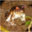

In [6]:
X_train[0]

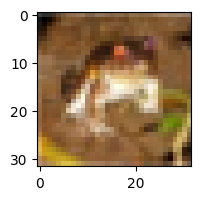

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def plot_sample(X,y,index):
  plt.figure(figsize=(11,2))
  plt.imshow(X[index])
  plt.xlabel([classes[y[index]]])

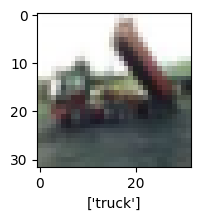

In [12]:
plot_sample(X_train,y_train,2)

In [13]:
X_train=X_train/255
X_test=X_test/255
X_train.shape

(50000, 32, 32, 3)

In [14]:
#Using Artificial convolution network to compare the accuracy and evaluation
from keras import Input
ann=models.Sequential([
    Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),



])

ann.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [15]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2725 - loss: 2.1931
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3899 - loss: 1.6872
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4273 - loss: 1.5903
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4511 - loss: 1.5331
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4629 - loss: 1.4874
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4763 - loss: 1.4633
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4869 - loss: 1.4383
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4932 - loss: 1.4230
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5052 - loss: 1.3918
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5087 - loss: 1.3749


In [16]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4865 - loss: 1.4629


[1.4582079648971558, 0.48669999837875366]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.10716437, 0.17748436, 0.24593723, 0.65482676, 0.3560122 ,
        0.70399904, 0.24908938, 0.18495966, 0.43616632, 0.08592684],
       [0.52902377, 0.87775594, 0.22842589, 0.03438083, 0.00355902,
        0.08475094, 0.2635666 , 0.05706831, 0.8780577 , 0.93062216],
       [0.8710483 , 0.8786684 , 0.17881477, 0.07743263, 0.06806485,
        0.11779349, 0.00588486, 0.16981024, 0.9606381 , 0.7353352 ],
       [0.5497164 , 0.4497161 , 0.48199028, 0.4216926 , 0.3150719 ,
        0.39717746, 0.10421746, 0.28203714, 0.7889282 , 0.32544976],
       [0.02309443, 0.00443318, 0.8476319 , 0.651     , 0.91949975,
        0.55506897, 0.8286436 , 0.32539588, 0.01762185, 0.01250641]],
      dtype=float32)

In [20]:
y_pred_classes=[np.argmax(element) for element in y_pred]


In [21]:
print(classification_report (y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.64      0.46      0.54      1000
           1       0.57      0.67      0.62      1000
           2       0.37      0.40      0.38      1000
           3       0.34      0.31      0.32      1000
           4       0.48      0.26      0.34      1000
           5       0.42      0.34      0.38      1000
           6       0.40      0.74      0.51      1000
           7       0.53      0.60      0.56      1000
           8       0.61      0.65      0.63      1000
           9       0.62      0.44      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [24]:
#Using convolution neural network to compare the performance (CNN)
cnn=models.Sequential([
    Input(shape=(32,32,3)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [25]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3969 - loss: 1.6620
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6063 - loss: 1.1190
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6614 - loss: 0.9726
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6936 - loss: 0.8807
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7181 - loss: 0.8156
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7393 - loss: 0.7534
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7492 - loss: 0.7179
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7688 - loss: 0.6676
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7826 - loss: 0.6192
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7975 - loss: 0.5777


In [27]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7037 - loss: 0.9056


[0.9186919927597046, 0.6985999941825867]

In [33]:
y_test=y_test.reshape(-1,)

y_pred=cnn.predict(X_train)
y_pred_classes=[np.argmax(element) for element in y_pred]


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
#The cnn performs better